![A7 Header](A7.jpg)

<h1 style="font-family:Arial;color:#333399"> Python API call to Retrieve Order Book Data from A7 API </h1>

<p style="color:#333333;font-family:Arial">
This article is designed to show users how to use A7 Python API to extract data (e.g. top of the book) for a given futures contract. We cover a simple call to download data using algos functionality in A7. Addtionally this article provides the backbone of further uses cases.   
</p>
<p style="color:#333333;font-family:Arial">
The following segment of code sets up the API parameters and imports packages.    
</p>

In [1]:
import pandas as pd
import requests
import numpy as np
from pprint import pprint

proxies = {
"http":  "", #Enter http Proxy if needed",
"https": ""  #Enter https Proxy if needed",
}
owner = "login" # Enter your login name here
 
API_TOKEN="Bearer "+"Enter API Token" 

<p style="color:#333333;font-family:Arial">
Below is the main function call to retrieve top of the order book for FGBL futures contract (Security ID 4611674) given a date. Note that a market segment ID (688) needs to be provided in the call as well. This data can be obtained from the A7 UI or from RDI (please refer to RDI usecase).       
</p>

In [2]:
url = 'https://a7.deutsche-boerse.com/api/v1/algo/{}'.format(owner)
r = requests.get(url = url,  headers={'Authorization': API_TOKEN}, proxies = proxies)
pprint(r.json())

{'algos': ['DBAG',
           'XEUR_Depth',
           'XEUR_LAMQ',
           'XEUR_RPD',
           'XEUR_SLM',
           'XEUR_Spread',
           'auction',
           'depth',
           'instrument_state',
           'price_level',
           'spread',
           'summary',
           'top_level',
           'traded_volume',
           'DBAG',
           'XEUR_Depth',
           'XEUR_LAMQ',
           'XEUR_RPD',
           'XEUR_SLM',
           'XEUR_Spread',
           'auction',
           'depth',
           'instrument_state',
           'price_level',
           'spread',
           'summary',
           'top_level',
           'traded_volume'],
 'success': True}


In [30]:
url = 'https://a7.deutsche-boerse.com/api/v1/algo/{}/top_level/'.format(owner)
url = url+'run?marketId=XEUR&date=20200804&marketSegmentId=688&securityId=4611674'
r = requests.get(url = url,  headers={'Authorization': API_TOKEN}, proxies = proxies)
res = r.json()

<p style="color:#333333;font-family:Arial">
The request returns a JSON data format. This can be parsed into a data structure. For example below we expand the JSON format into a DataFrame for the bid side.         
</p>

In [31]:
df_b = pd.DataFrame()
df_b = df_b.assign(ts=res[0]['series'][0]['content']['ts'])
df_b = df_b.assign(pv=res[0]['series'][0]['content']['price'])
df_b['pv']=df_b['pv'].astype(float)/1e3
df_b = df_b.dropna()
df_b['ts'] = df_b['ts'].astype(np.int64)
df_b['ts'] = pd.to_datetime(df_b['ts'])
print(df_b.head())

                             ts      pv
0 2020-08-04 00:15:13.378085871  177.31
1 2020-08-04 00:15:13.378958683  177.32
2 2020-08-04 00:15:13.474408899  177.33
3 2020-08-04 00:15:13.475364501  177.32
4 2020-08-04 00:15:13.484721498  177.33


<p style="color:#333333;font-family:Arial">
The same strategy can be used to extract for the offer side.        
</p>

In [23]:
df_a = pd.DataFrame()
df_a = df_a.assign(ts=res[0]['series'][1]['content']['ts'])
df_a = df_a.assign(pv=res[0]['series'][1]['content']['price'])
df_a['pv']=df_a['pv'].astype(float)/1e3
df_a = df_a.dropna()
df_a['ts'] = df_a['ts'].astype(np.int64)
df_a['ts'] = pd.to_datetime(df_a['ts'])

<p style="color:#333333;font-family:Arial">
Once the data has been extracted and formatted as above it can be visualised.       
</p>

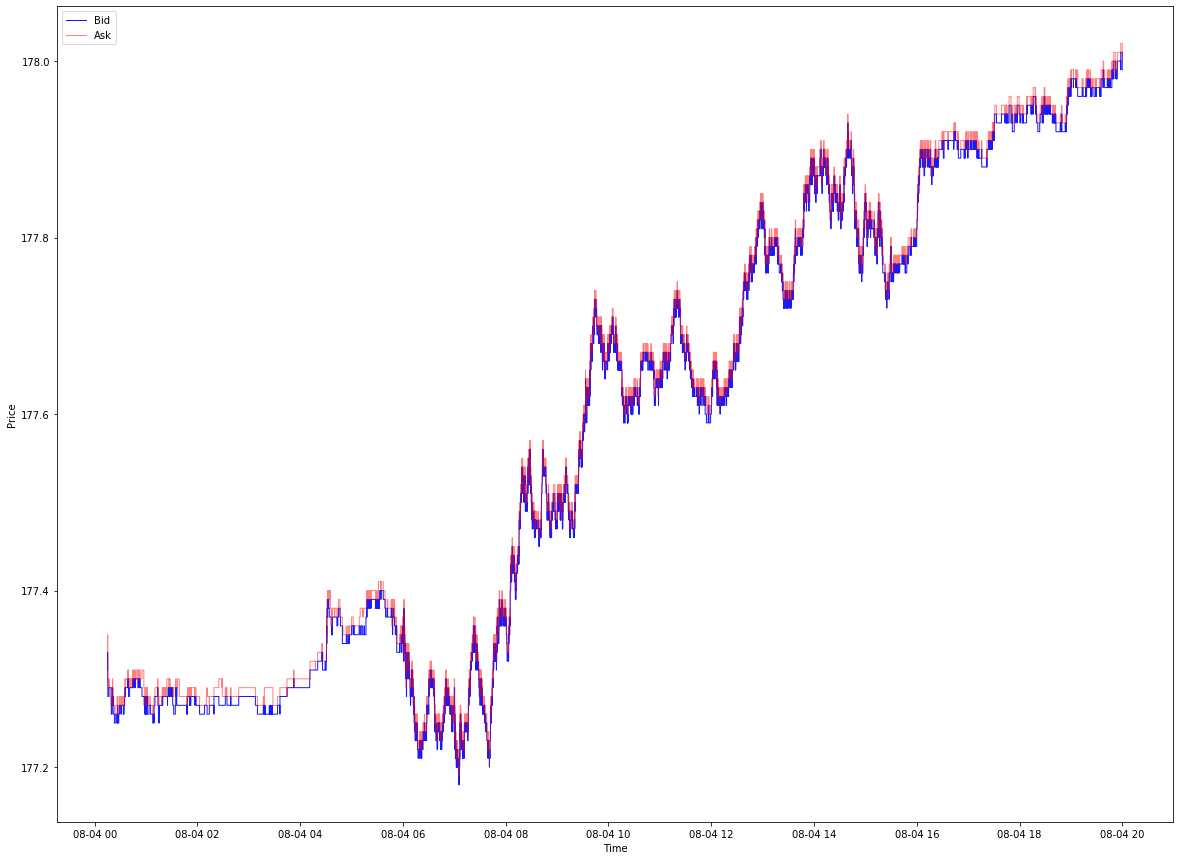

In [27]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(111)
ax1.step(df_b['ts'], df_b['pv'], alpha=0.9, linewidth=1.0, label='Bid', color='b')
ax1.step(df_a['ts'], df_a['pv'], alpha=0.5, linewidth=1.0, label='Ask', color='r')
ax1.legend(loc="best")
ax1.set_xlabel('Time')
ax1.set_ylabel('Price')
plt.show()